In [1]:
# Import google drive for 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
# import packages
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import torch
import matplotlib.image as mpimg

%matplotlib inline

In [5]:
# dataset path to work
dataset_zip = "/content/drive/MyDrive/datasets/sd_car_dataset_for_yolo.zip"

In [6]:
# Extracting all the files in the dataset to train the model
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
  zip_ref.extractall()

In [7]:
# Download the trained model from YoloV5 hypertuning 
!git clone https://github.com/ZaranaB/yolotuned  # clone repo
%cd yolotuned
%pip install -qr requirements.txt # install dependencies

Cloning into 'yolotuned'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 193 (delta 30), reused 193 (delta 30), pack-reused 0
Receiving objects: 100% (193/193), 57.26 MiB | 31.07 MiB/s, done.
Resolving deltas: 100% (30/30), done.
/content/yolotuned
     |████████████████████████████████| 596 kB 10.1 MB/s 


In [8]:
# Change directories
%cd ..

/content


# Model building and Hyper-parameter tuning of Yolo V5



In [10]:
# Import YoloV5 package for model building
from yolotuned import train 

# Transfer Learning using the best fine-tuned model

In [11]:
# Build the model with the fine-tuned weights
result = train.run(data="sd_car_dataset_for_yolo/data.yaml", imgsz=512, epochs=1, batch_size=32, adam=True, cache="ram", weights="yolotuned/best.pt")

train: weights=yolotuned/best.pt, cfg=, data=sd_car_dataset_for_yolo/data.yaml, hyp=yolotuned/data/hyps/hyp.scratch.yaml, epochs=1, batch_size=32, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=True, sync_bn=False, workers=1, project=yolotuned/runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest


Callbacks are set {'on_pretrain_routine_start': [], 'on_pretrain_routine_end': [], 'on_train_start': [], 'on_train_epoch_start': [], 'on_train_batch_start': [], 'optimizer_step': [], 'on_before_zero_grad': [], 'on_train_batch_end': [], 'on_train_epoch_end': [], 'on_val_start': [], 'on_val_batch_start': [], 'on_val_image_end': [], 'on_val_batch_end': [], 'on_val_end': [], 'on_fit_epoch_end': [], 'on_model_save': [], 'on_train_end': [], 'teardown': []}
github: up to date with https://github.com/ZaranaB/yolotuned ✅
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /content/yolotuned/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 251bd10 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
TensorBoard: Start with 'tensorboard --logdir yolotuned/runs/train', view at http://localhost:6006/


Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5 🚀 runs (RECOMMENDED)



                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]              
  8                -1  1   1182720  

Optimizer stripped from yolotuned/runs/train/exp3/weights/last.pt, 14.4MB
Optimizer stripped from yolotuned/runs/train/exp3/weights/best.pt, 14.4MB



Validating yolotuned/runs/train/exp3/weights/best.pt...
Fusing layers... 
Model Summary: 213 layers, 7039792 parameters, 0 gradients, 15.9 GFLOPs
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 47/47 [00:32<00:00,  1.46it/s]
                 all       2979      19603      0.566      0.159      0.136      0.047
               biker       2979        356          1          0      0.062     0.0172
                 car       2979      12877      0.656      0.336      0.428      0.186
          pedestrian       2979       2290      0.372     0.0397     0.0618     0.0146
        trafficLight       2979        492      0.232      0.451      0.148     0.0427
  trafficLight-Green       2979       1118      0.481      0.339      0.261     0.0776
trafficLight-GreenLeft       2979         50          1          0     0.0161    0.00709
    trafficLight-Red       2979       1265      0.351      0.492      0.353      0.117
trafficLight-RedLef

In [12]:
# import parameter grid from sklearn to perform grid search
from sklearn.model_selection import ParameterGrid

In [13]:
# A function that builds and trains the model with the passed hyper-parameters
failsafe_results_dir = []
def custom_yolov5_grid_search(hyp_params):
  print("===" * 20)
  print("Running Model with hyperparameters", hyp_params)
  print("===" * 20)
  result_dirs = []
  # Setting the default hyper-paramters
  set_adam = False
  set_batch_size = 16
  # Updated the default hyper-parameters based on the user provided params
  if "optimizer" in hyp_params:
    if hyp_params["optimizer"] == "adam":
      # set adam optimizer
      set_adam = True
  
  if "batch_size" in hyp_params:
    # set batch size
    set_batch_size = hyp_params["batch_size"]

  # Performing the transfer learning because the weights from the fine tune model are being used
  # build and train the yolov5 on the self driving car dataset with the custom hyper-parameters
  result = train.run(data="sd_car_dataset_for_yolo/data.yaml", imgsz=512, epochs=15, batch_size=set_batch_size, 
                     adam=set_adam, weights="yolov5custom/best.pt")
  # result = train.run(epochs=30, batch_size=set_batch_size, adam=set_adam) 

  # model run history path
  result_dir = result["extras"]["save_dir"].as_posix()
  result_dirs.append(result_dir)
  failsafe_results_dir.append(result_dir)
  return result_dirs

In [14]:
# Initiliazing the hyperparameters to try for the model
yolo_hyperparams_to_try = {"optimizer": ["adam", "sgd"], "batch_size": [32]}

In [ ]:
# Generate the combination of hyperparameters from the grid search
# call the previously defined custom_yolov5_grid_search function to run
# one combination at a time
# ONLY RUN TO TRAIN THE MODEL, TAKES SEVERAL HOURS TO RUN
grid_search_result_dirs = []
for hyp_params in ParameterGrid(yolo_hyperparams_to_try):
  grid_search_result_dirs = custom_yolov5_grid_search(hyp_params)

train: weights=yolov5custom/best.pt, cfg=, data=sd_car_dataset_for_yolo/data.yaml, hyp=yolov5custom/data/hyps/hyp.scratch.yaml, epochs=15, batch_size=32, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=True, sync_bn=False, workers=1, project=yolov5custom/runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest


Running Model with hyperparameters {'batch_size': 32, 'optimizer': 'adam'}
Callbacks are set {'on_pretrain_routine_start': [], 'on_pretrain_routine_end': [], 'on_train_start': [], 'on_train_epoch_start': [], 'on_train_batch_start': [], 'optimizer_step': [], 'on_before_zero_grad': [], 'on_train_batch_end': [], 'on_train_epoch_end': [], 'on_val_start': [], 'on_val_batch_start': [], 'on_val_image_end': [], 'on_val_batch_end': [], 'on_val_end': [], 'on_fit_epoch_end': [], 'on_model_save': [], 'on_train_end': [], 'teardown': []}
github: up to date with https://github.com/ZaranaB/yolov5custom ✅
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /content/yolov5custom/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 9e30f84 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
TensorBoard: Start with 'tensorboard --logdir yolov5custom/runs/train', view at http://localhost:6006/


Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5 🚀 runs (RECOMMENDED)



                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]              
  8                -1  1   1182720  

Optimizer stripped from yolov5custom/runs/train/exp/weights/last.pt, 14.4MB
Optimizer stripped from yolov5custom/runs/train/exp/weights/best.pt, 14.4MB


Fusing layers... 
Model Summary: 213 layers, 7039792 parameters, 0 gradients, 15.9 GFLOPs
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 47/47 [00:29<00:00,  1.61it/s]
                 all       2979      19603      0.572      0.398      0.451      0.208
               biker       2979        356      0.558      0.374      0.405      0.165
                 car       2979      12877      0.765       0.77      0.813      0.461
          pedestrian       2979       2290      0.586      0.346      0.401      0.134
        trafficLight       2979        492       0.55      0.428      0.475      0.216
  trafficLight-Green       2979       1118      0.599       0.62      0.544      0.196
trafficLight-GreenLeft       2979         50          0          0      0.135     0.0706
    trafficLight-Red       2979       1265      0.695      0.703      0.721      0.311
trafficLight-RedLeft       2979        326      0.798      0.496      0.584 

Running Model with hyperparameters {'batch_size': 32, 'optimizer': 'sgd'}
Callbacks are set {'on_pretrain_routine_start': [], 'on_pretrain_routine_end': [{'name': '', 'callback': <bound method Loggers.on_pretrain_routine_end of <utils.loggers.Loggers object at 0x7ff2f7254e10>>}], 'on_train_start': [], 'on_train_epoch_start': [], 'on_train_batch_start': [], 'optimizer_step': [], 'on_before_zero_grad': [], 'on_train_batch_end': [{'name': '', 'callback': <bound method Loggers.on_train_batch_end of <utils.loggers.Loggers object at 0x7ff2f7254e10>>}], 'on_train_epoch_end': [{'name': '', 'callback': <bound method Loggers.on_train_epoch_end of <utils.loggers.Loggers object at 0x7ff2f7254e10>>}], 'on_val_start': [], 'on_val_batch_start': [], 'on_val_image_end': [{'name': '', 'callback': <bound method Loggers.on_val_image_end of <utils.loggers.Loggers object at 0x7ff2f7254e10>>}], 'on_val_batch_end': [], 'on_val_end': [{'name': '', 'callback': <bound method Loggers.on_val_end of <utils.loggers.

YOLOv5 🚀 9e30f84 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
TensorBoard: Start with 'tensorboard --logdir yolov5custom/runs/train', view at http://localhost:6006/



requirements: 1 package updated per /content/yolov5custom/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5 🚀 runs (RECOMMENDED)



                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]              
  8                -1  1   1182720  

Optimizer stripped from yolov5custom/runs/train/exp2/weights/last.pt, 14.4MB
Optimizer stripped from yolov5custom/runs/train/exp2/weights/best.pt, 14.4MB


Fusing layers... 
Model Summary: 213 layers, 7039792 parameters, 0 gradients, 15.9 GFLOPs
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 47/47 [00:28<00:00,  1.65it/s]
                 all       2979      19603      0.866      0.616      0.688      0.363
               biker       2979        356      0.826      0.579      0.665      0.307
                 car       2979      12877      0.867      0.808      0.863      0.551
          pedestrian       2979       2290       0.79      0.514      0.616      0.254
        trafficLight       2979        492      0.882      0.813      0.887      0.502
  trafficLight-Green       2979       1118      0.841      0.648      0.741      0.311
trafficLight-GreenLeft       2979         50      0.866       0.64      0.694      0.345
    trafficLight-Red       2979       1265      0.895      0.783      0.853      0.465
trafficLight-RedLeft       2979        326      0.866      0.711      0.821 

# Model Selection

In [112]:
# Setting path to the model results
model_results_dir = "/content/yolotuned/runs/train"

In [113]:
# Fetch the results from the hyperparameter tuning
if len(failsafe_results_dir) == 0:
  for run_folder in os.listdir(model_results_dir):
    failsafe_results_dir.append(run_folder)

In [114]:
# loading train results from each folder and loading on to
# pandas dataframe
model_dataframes = {}
for folder in failsafe_results_dir:
  # selecting the hyperparamter model, rejecting the initial runs
  if folder in ["exp", "exp2"]:
    results_file = model_results_dir + "/" + folder + "/" + "results.csv"
    model_dataframes[folder] = pd.read_csv(results_file)

In [115]:
# Fetch the metrics to plot
model_columns = model_dataframes["exp"].columns
clean_model_columns = []
for col in model_columns:
  clean_model_columns.append(col.strip())

for model_df_key in model_dataframes:
  model_dataframes[model_df_key].columns = clean_model_columns

metrics_column_names = model_dataframes[model_df_key].columns[:-3]
metrics_column_names

Index(['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss',
       'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5',
       'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss'],
      dtype='object')

In [116]:
model_dataframes["exp"] = model_dataframes["exp"][:15]

In [117]:
# collect data into different arrays for plotting

# exp ran with hyperparams {'batch_size': 32, 'optimizer': 'adam'}
# exp2 ran with hyperparams {'batch_size': 32, 'optimizer': 'sgd'}

exp_data = model_dataframes["exp"].to_dict()
exp2_data = model_dataframes["exp2"].to_dict()


In [118]:
epochs = list(exp_data["epoch"].values())

In [153]:
# Fetch metric by name
def get_metric(col_name):
  vals = []
  val_1 = list(exp_data[col_name].values())
  val_2 = list(exp2_data[col_name].values())
  vals.append(val_1)
  vals.append(val_2)
  return vals

def display_plot(column_name, plot_title, labels=["Adam Optimizer", "SGD Optimizer"]):
  metric_vals = get_metric(column_name) 
  plt.plot(epochs, metric_vals[0], color="green", label=labels[0])
  plt.plot(epochs, metric_vals[1], color="blue", label=labels[1])
  plt.title(plot_title)
  plt.legend(loc="upper right")
  plt.xlabel("Epochs")
  plt.ylabel(column_name.capitalize())
  plt.show()

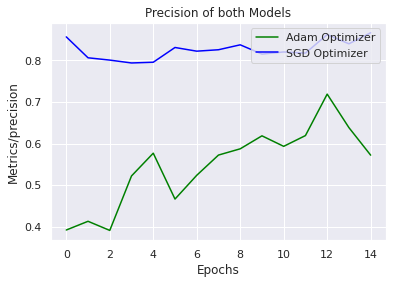

In [157]:
display_plot("metrics/precision", "Precision of both Models")

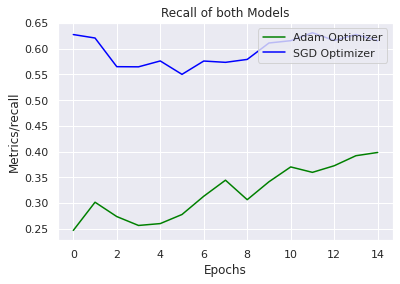

In [158]:
display_plot("metrics/recall", "Recall of both Models")

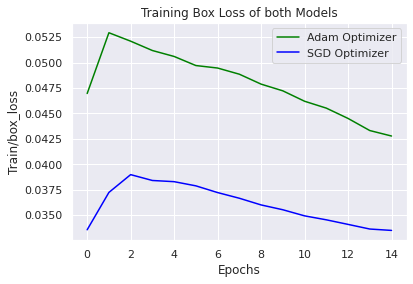

In [159]:
display_plot("train/box_loss", "Training Box Loss of both Models")

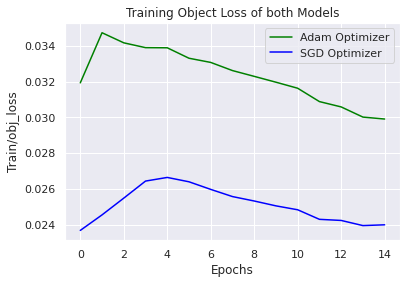

In [160]:
display_plot("train/obj_loss", "Training Object Loss of both Models")

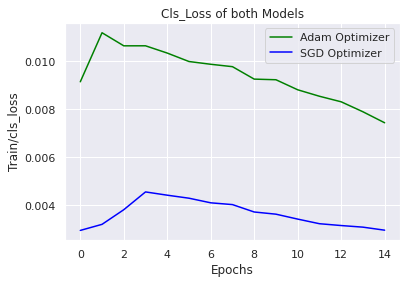

In [163]:
display_plot("train/cls_loss", "Traning Cls_Loss of both Models")

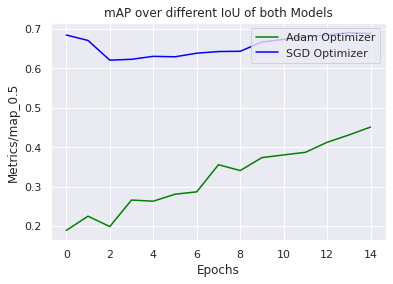

In [165]:
display_plot("metrics/mAP_0.5", "Traning mAP over different IoU of both Models")

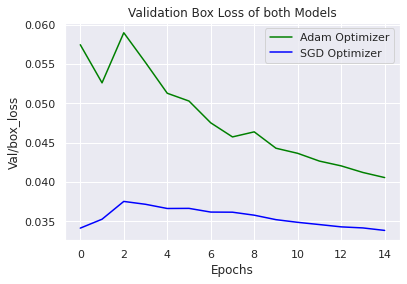

In [166]:
display_plot("val/box_loss", "Validation Box Loss of both Models")

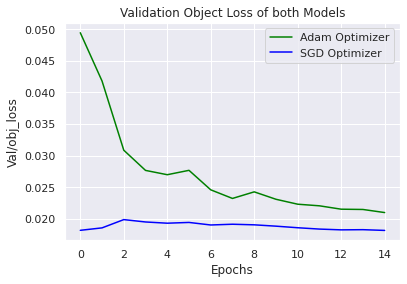

In [221]:
display_plot("val/obj_loss", "Validation Object Loss of both Models")

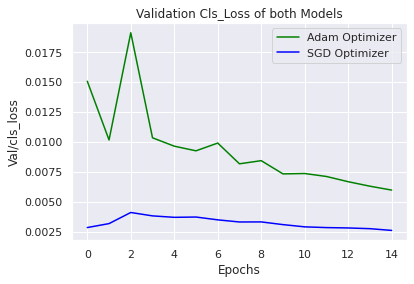

In [222]:
display_plot("val/cls_loss", "Validation Cls_Loss of both Models")

# Displaying Results

In [ ]:
# From the above metrics, it can be seen that SGD optimizer is the best
# hyper parameter and the batch size 32 has given better results

# Loading the best model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

In [178]:
dataset_images = ["/content/sd_car_dataset_for_yolo/images/val/1478019952686311006_jpg.rf.54e2d12dbabc46be3c78995b6eaf3fee.jpg"]

In [191]:
results = model(dataset_images)

In [192]:
results.save()

Saved 1 image to runs/detect/exp2


In [212]:
# sampling some images for displaying results
result_img_list = ['/content/sd_car_dataset_for_yolo/images/val/1478019952686311006_jpg.rf.54e2d12dbabc46be3c78995b6eaf3fee.jpg',
'/content/sd_car_dataset_for_yolo/images/val/1478020231691535596_jpg.rf.9f9fe0fd814de0f099c54de14febc148.jpg',
'/content/sd_car_dataset_for_yolo/images/val/1478020304192296417_jpg.rf.79d9701563f57f4fb7b62e9125eb6a36.jpg',
'/content/sd_car_dataset_for_yolo/images/val/1478020609703211574_jpg.rf.002264b82dfebee20830a9886e268f2b.jpg',
'/content/sd_car_dataset_for_yolo/images/val/1478020910713286061_jpg.rf.dad59c559df702486b3ec9320c00dc43.jpg']

In [213]:
results = model(result_img_list)

In [214]:
results.save()

Saved 5 images to runs/detect/exp5


# Prediction from the model

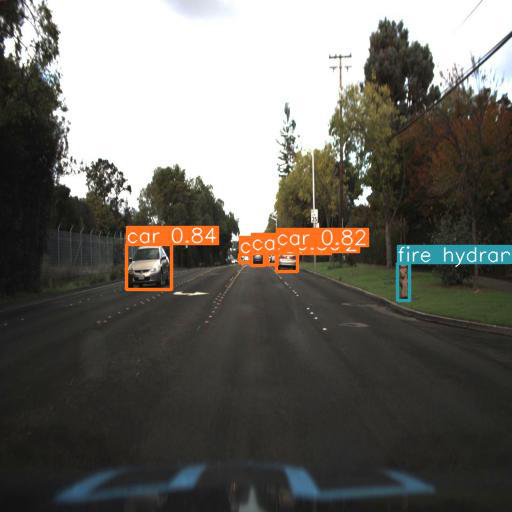

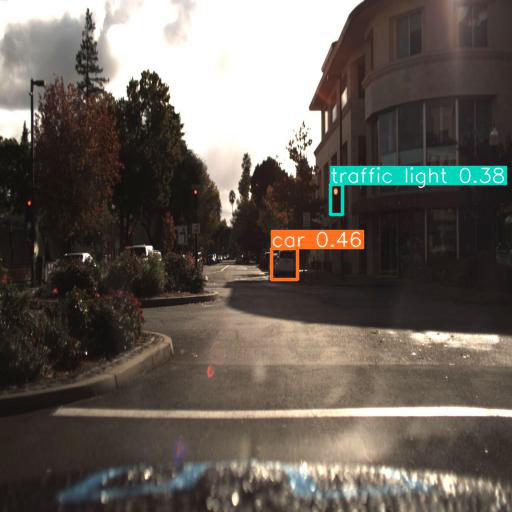

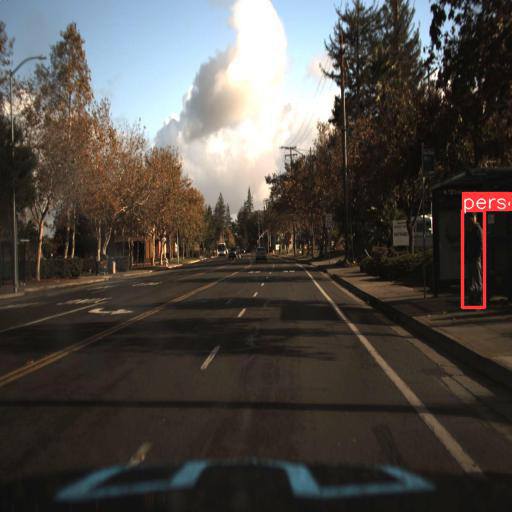

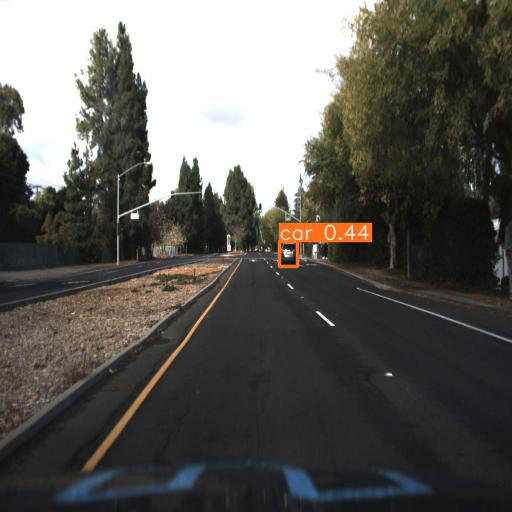

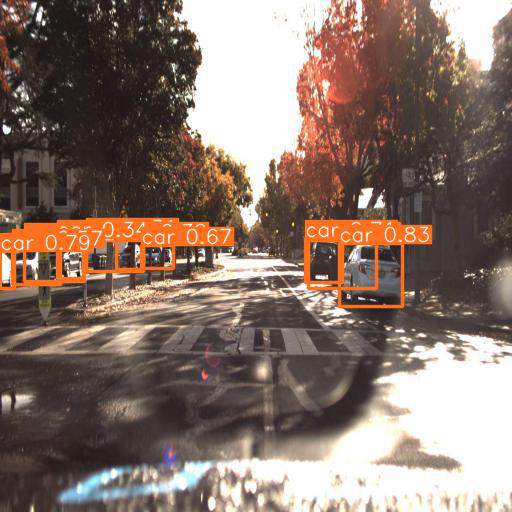

In [216]:
from PIL import Image

results_img_dir = "/content/runs/detect/exp5/"

for result_file in os.listdir(results_img_dir):
  image = Image.open(results_img_dir + result_file)
  display(image)